In [172]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
from mpl_toolkits.mplot3d import Axes3D

In [173]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

In [174]:

delta = .0001 ## 100 micrometer precision

lenX = .120 # range we are looking at (120 mm)
R = .08 ## mm (2/3 the size of the range you are looking at)
range_x = np.arange(-lenX/2, lenX/2, delta)
lenZ = R/4.0 ## the distance between your plates
range_z = np.arange(-lenZ, 0, delta)

fopt = 2 - (2*np.pi)/float(len(range_z))

#BCs
#Ttop = 50  ## insert gaussian beam profile for IFO beam heating (right now it is just a delta function BC)
V = 20.0 ## Voltage applied to plates
Utop = V
Ubottom = V
Uleft = 0
Uright = 0

# Initial guess of what the temperature of inside will be
Uguess = 0

#Set interpolation and colormap
colorinterp = 100
colormap = plt.cm.coolwarm

#Set meshgrid
X, Z = np.meshgrid(range_x, range_z)


U = np.empty((len(range_z), len(range_x)))
U_before = np.empty((len(range_z), len(range_x)))
U.fill(Uguess)

U.shape
#Set BC
## Plates are finite, establish size
rad_plate = len(range_z)

U[0,:] = Ubottom
U[len(range_z)-1,:] = Utop
U[:, (len(range_x)-1):] = Uright
U[:, :1] = Uleft


In [175]:
# Iteration
print("Please wait for a moment")
conv = 11
count = 0
start = time.time()
while conv > 10: 
    conv = np.sum(np.abs(U[:,:]-U_before[:,:]))
    print(conv)
    U_before[:,:] = U[:,:]
    for j in range(1, len(range_x)-1):
        for i in range(1, len(range_z)-1):
			U[i,j] = (1-fopt) * U[i,j] + fopt*.25*(U[i+1][j] + U[i-1][j] + U[i][j+1]+ U[i][j-1])

    for j in range(1, len(range_x)-1)[::-1]:
        for i in range(1, len(range_z)-1)[::-1]:
			U[i,j] = (1-fopt) * U[i,j] + fopt*.25*(U[i+1][j] + U[i-1][j] + U[i][j+1]+ U[i][j-1])
			#T[i,j] = .25*(T[i+1][j] + T[i-1][j] + T[i][j+1]+ T[i][j-1])
    count += 1
elapsed = time.time() - start
    

print("Iteration finished after {} iterations and took {} seconds".format(count, elapsed))

Please wait for a moment
1074599.5805678582
775415.545811448
66435.15616410934
63205.553726052734
61264.652854753906
59559.46698236736
57961.33898067006
56439.40913514585
54982.23283241997
53583.69495466289
52239.68086320463
50947.009817423495
49702.881099077196
48504.87323597024
47350.67146714998
46238.19544764171
45165.47526719791
44130.63339385056
43131.91156739166
42167.65470706723
41236.29576350914
40336.355327922895
39466.414750073614
38625.13309109284
37811.23733237416
37023.52356812028
36260.84797248494
35522.12496369779
34806.32203924169
34112.457014164305
33439.597704561216
32786.85780809669
32153.395968957273
31538.410814427978
30941.141909308593
30360.86532486023
29796.890326627057
29248.560596590374
28715.25228743719
28196.3733702271
27691.355922714316
27199.66073850134
26720.77476422789
26254.20913018415
25799.498172765285
25356.196677162417
24923.88163197431
24502.14918421572
24090.614259568167
23688.909472511572
23296.684593393493
22913.604982355868
22539.35126239694
22

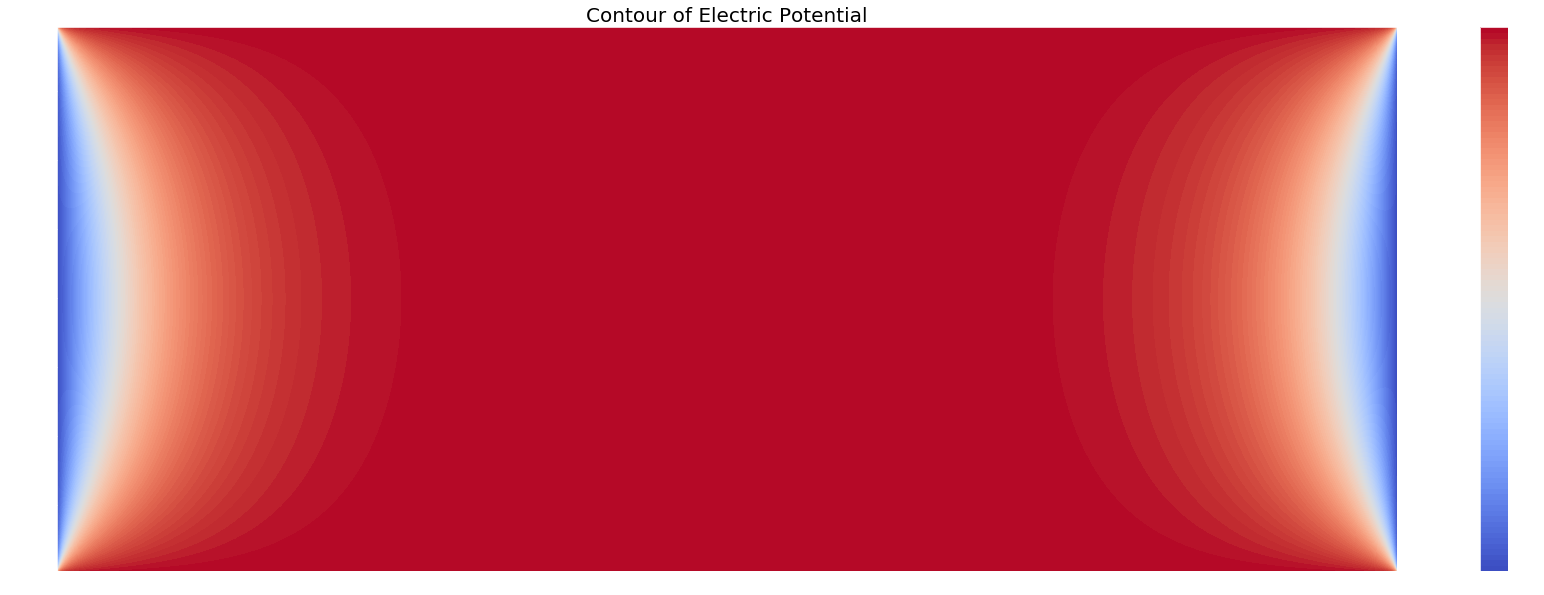

In [176]:
figure = plt.figure(figsize=(30,10))
plt.contourf(X[1:-1,1:-1],Y[1:-1,1:-1],U[1:-1,1:-1], colorinterp, cmap=colormap)
plt.title("Contour of Electric Potential", fontsize=20)
#Set Colorbar
plt.colorbar()
#Show the result in the plot winow
plt.show()
print("")

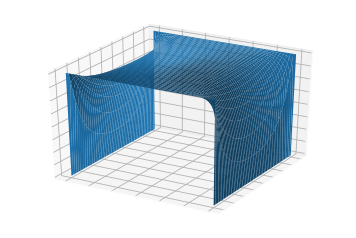

In [177]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Z, U)

In [178]:
## Analytical solution

def griff_anal(V_o,Y,X, n, d, r_plate): 
    term_1 = (4.0*V_o)/np.pi
    term_2 = 0
    for i in range(1,n):
        term_2 += (np.cosh((float(i)*np.pi*Y)/(d)*np.sin((float(i)*np.pi*Y/(r_plate*2)/(float(i)*np.cosh((float(i)*np.pi*lenZ)/d))
    return term_1*term_2


In [179]:
U_anal = griff_anal(V,Z,X,3, 

NameError: global name 'a' is not defined

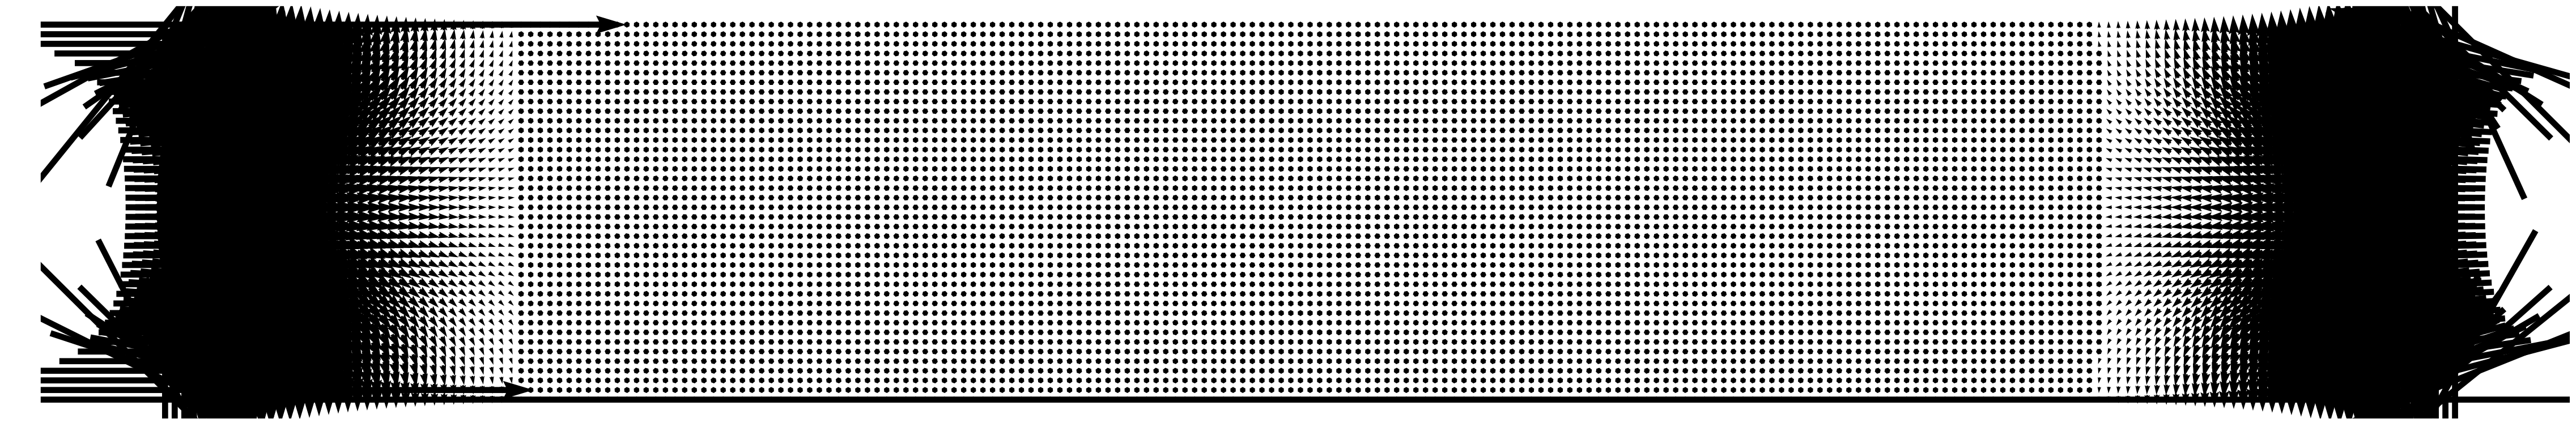

In [159]:
## Electric field calculation via finite differences
E_U = np.empty((len(range_y),len(range_x)))
E_V = np.empty((len(range_y),len(range_x)))

#grad_span = 1
skip = 5
E_U, E_V = np.gradient(U, delta)
#E_U, E_V = np.gradient(T[grad_span:-grad_span,grad_span:-grad_span], delta)

#X_new = X[grad_span:-grad_span,grad_span:-grad_span]
X_new = X
#Y_new = Y[grad_span:-grad_span,grad_span:-grad_span]
Z_new = Z
fig, ax = plt.subplots(figsize=(80, 40))
q = ax.quiver(X[::skip,::skip], Y[::skip,::skip], E_V[::skip,::skip], E_U[::skip,::skip], units='xy', pivot='mid', cmap='magma')
ax.set_aspect('equal')
plt.xlabel('x-coordinate [1mm dot separation]')
plt.ylabel('z-coordinate [1mm dot separation]')
plt.show()

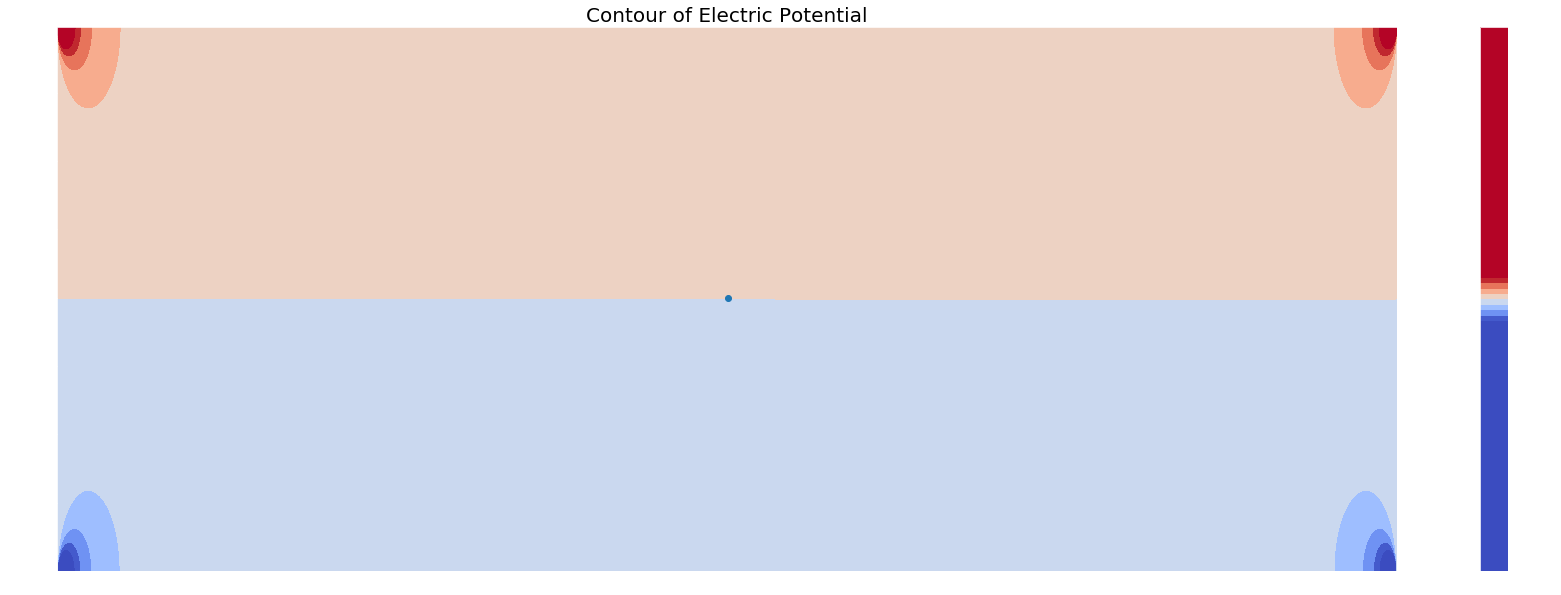

In [160]:
figure = plt.figure(figsize=(30,10))
plt.contourf(X,Z,E_U, colorinterp, cmap=colormap)
plt.title("Contour of Electric Potential", fontsize=20)
#Set Colorbar
plt.colorbar()
plt.clim(vmin=-7500, vmax=7500)
plt.scatter(lenX/2.0, -lenZ/2.0)
#Show the result in the plot winow
plt.show()
print("")

In [161]:
E_center = E_U[len(range_z)/2, len(range_x)/2]
U_center = U[len(range_z)/2, len(range_x)/2]
print(E_center, U_center)

(0.011992076238698246, 19.988983907368638)


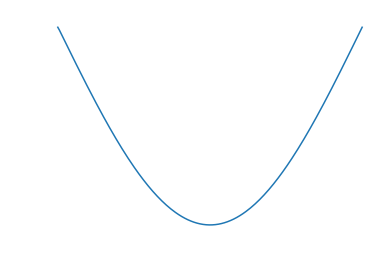

In [162]:
plt.plot(range_z,U[:,len(range_x)/2])

In [107]:
for i in range(0, len(X[0][:])-1): 
    if X[0][i] == .06: 
        print i
        
for j in range(0, len(Z[:,0])-1): 
    if Z[j,0] == -0.005: 
        print j

60


In [147]:
E_U[len(range_z)/2,len(range_x)/2]

0.00010172704805194783